<a href="https://colab.research.google.com/github/amreyes14/ITP487_NBAStats_reyes/blob/main/arlene-reyes-hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas_bokeh
#!pip install --upgrade bokeh==2.4.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_bokeh

pd.set_option('display.max_rows', 100)
#pd.set_option('plotting.backend', 'pandas_bokeh')
#pandas_bokeh.output_notebook()

In [ ]:
!wget -nc = 'https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv'

--2024-04-10 22:01:42--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-04-10 22:01:42--  https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84835 (83K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  82.85K  --.-KB/s    in 0.004s  

2024-04-10 22:01:43 (21.9 MB/s) - ‘titanic.csv’ saved [84835/84835]

FINISHED --2024-04-10 22:01:43--
Total wall clock time: 0.09s
Downloaded: 1 files, 83K in 0.004s (21.9 MB/s)


In [ ]:
titanic_raw = pd.read_csv('titanic.csv')

titanic_raw.head(5)
titanic_raw.shape


(1309, 11)

In [ ]:
df_titanic = titanic_raw
df_titanic.isnull().sum()

df_titanic = df_titanic.drop(['cabin'], axis=1)
df_titanic = df_titanic.dropna(axis=0)
df_titanic.shape

df_titanic = df_titanic.drop_duplicates()
df_titanic.shape

df_titanic = df_titanic.drop(['ticket', 'name'], axis=1)
df_titanic.shape

(1043, 8)

In [ ]:
df_titanic['familysize'] = df_titanic['sibsp'] + df_titanic['parch'] + 1
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familysize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
bins = [0, 2, 12, 18, 65, 99]
labels = ['Infant', 'Child', 'Teenager', 'Adult', 'Senior']
df_titanic['agegroup'] = pd.cut(df_titanic['age'], bins=bins, labels=labels, right=False)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familysize,agegroup
0,0,3,male,22.0,1,0,7.2500,S,2,Adult
1,1,1,female,38.0,1,0,71.2833,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,S,1,Adult
3,1,1,female,35.0,1,0,53.1000,S,2,Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Adult


Text(0.5, 1.0, 'Distribution of Age Groups on Titanic')

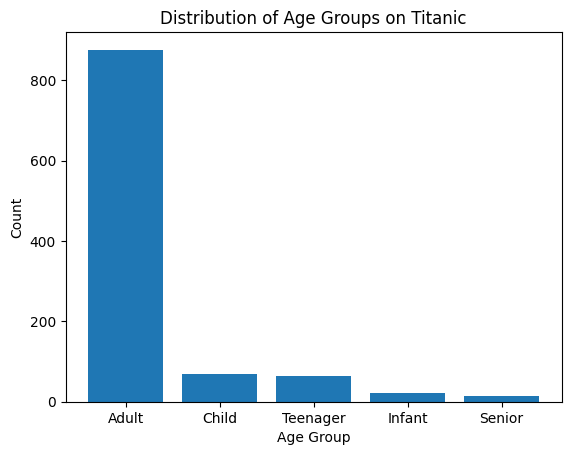

In [ ]:
agegroup_count = df_titanic['agegroup'].value_counts()

plt.bar(agegroup_count.index, agegroup_count.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups on Titanic')

In [ ]:
df_titanic['agegroup'].value_counts()

agegroup
Adult       876
Child        69
Teenager     63
Infant       22
Senior       13
Name: count, dtype: int64